In [1]:
import sys
sys.path.append("../")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
import re
import src.visualization as vs
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
import plotly.express as px
import plotly.graph_objects as go

### Importo mi csv con el dataframe enriquecido

In [4]:
df = pd.read_csv("../data/Food_enriched.csv", index_col =0) #para que no me figure la columna Unnamed: 0

In [5]:
df.head()

,Food,Serving,Calories,dietLabels,healthLabels,cautions,FAT.Total lipid,Total SUGAR(g),Total PROTEIN(g),Cholesterol(mg),Calcium(mg),VIT C(mg),Whater quantity,Sugar added
0,Artichoke,1 artichoke (128 g),60 cal,"['LOW_CARB', 'LOW_SODIUM']","['SUGAR_CONSCIOUS', 'LOW_POTASSIUM', 'KIDNEY_F...",['MILK'],11.603008,0.465376,1.736364,30.5300,28.618672,5.967,40.852088,NaN
1,Arugula,1 leaf (2 g),1 cal,['LOW_SODIUM'],"['FAT_FREE', 'LOW_FAT_ABS', 'SUGAR_CONSCIOUS',...",[],0.660000,2.050000,2.580000,0.0000,160.000000,15.000,91.710000,NaN
2,Asparagus,1 spear (12 g),2 cal,"['LOW_CARB', 'LOW_SODIUM']","['SUGAR_CONSCIOUS', 'LOW_POTASSIUM', 'KIDNEY_F...","['GLUTEN', 'WHEAT', 'MILK']",8.657737,1.143483,3.810045,4.8212,99.257480,3.816,55.288140,NaN
3,Aubergine,1 aubergine (458 g),115 cal,"['LOW_FAT', 'LOW_SODIUM']","['FAT_FREE', 'LOW_FAT_ABS', 'SUGAR_CONSCIOUS',...",[],0.227700,3.168000,0.821700,0.0000,5.940000,1.287,88.773300,NaN
4,Beetroot,1 beet (82 g),35 cal,"['LOW_FAT', 'LOW_SODIUM']","['FAT_FREE', 'LOW_FAT_ABS', 'KIDNEY_FRIENDLY',...",[],0.170000,6.760000,1.610000,0.0000,16.000000,4.900,87.580000,NaN


### 1. DESCRIPCIÓN DE HIPÓTESIS

#### - 1.El brócoli tiene menos azúcar que la coliflor pero más que la lechuga
#### - 2.La patata tiene menos proteina y grasa total que el boniato

### Hipótesis 1:

#### Creo un df solo para comparar los 3 alimentos de mi primera hipótesis

In [6]:
df_food_comparative = df[(df["Food"].isin(["Broccoli","Cauliflower","Lettuce"]))]

In [7]:
df_food_comparative

,Food,Serving,Calories,dietLabels,healthLabels,cautions,FAT.Total lipid,Total SUGAR(g),Total PROTEIN(g),Cholesterol(mg),Calcium(mg),VIT C(mg),Whater quantity,Sugar added
7,Broccoli,1 bunch (608 g),207 cal,"['LOW_FAT', 'LOW_SODIUM']","['FAT_FREE', 'LOW_FAT_ABS', 'SUGAR_CONSCIOUS',...",[],0.5476,2.5160,4.1736,0.0,69.56,132.016,132.1640,NaN
12,Cauliflower,1 floweret (13 g),3 cal,"['LOW_FAT', 'LOW_SODIUM']","['FAT_FREE', 'LOW_FAT_ABS', 'SUGAR_CONSCIOUS',...",[],0.1512,1.0314,1.0368,0.0,11.88,26.028,49.7178,NaN
39,Lettuce,1 head (600 g),90 cal,['LOW_SODIUM'],"['FAT_FREE', 'LOW_FAT_ABS', 'SUGAR_CONSCIOUS',...",[],0.2200,0.9400,1.3500,0.0,35.00,3.700,95.6300,NaN


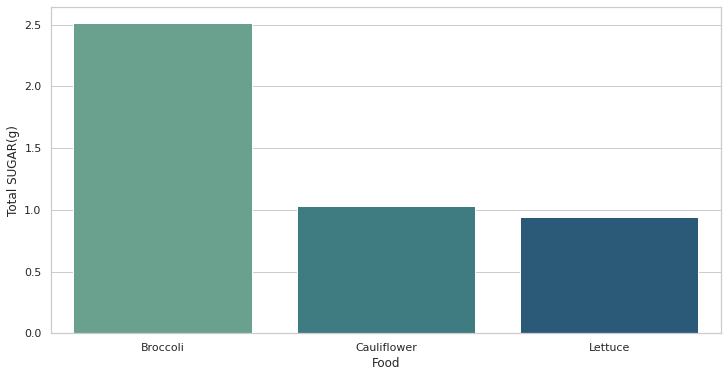

In [8]:
sns.barplot(y="Total SUGAR(g)", x = "Food", data = df_food_comparative,  palette="crest");

### Veo que se refuta mi hipótesis ya que el Brócoli tiene más azucar que la lechuga pero también tiene más azúcar que la coliflor.

### Hipótesis 2

#### Creo un df solo para comparar los 2 alimentos de mi segunda hipótesis

In [9]:
df_food_comparative2 = df[(df["Food"].isin(["Potato","Sweet Potato"]))]

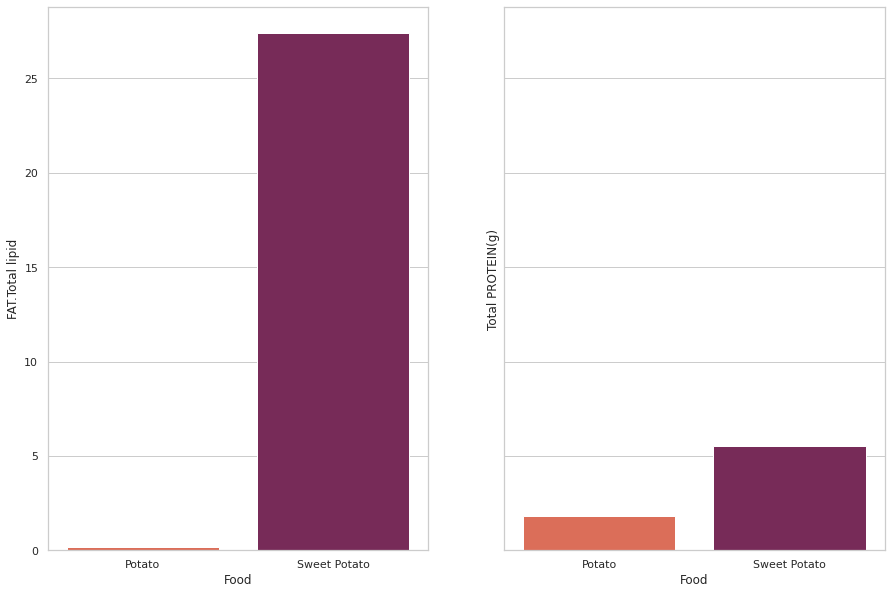

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10),sharey = True) #comparto la escala del eje
sns.barplot(y="FAT.Total lipid", x = "Food", data = df_food_comparative2,  palette="rocket_r", ax=ax[0])
sns.barplot(y="Total PROTEIN(g)", x = "Food", data = df_food_comparative2,  palette="rocket_r", ax=ax[1]);

### Veo que se cumple mi hipótesis ya que la patata tiene menos proteínas y menos grasas totales que el boniato.

## Otras comparativas:

### 1. Quiero comparar la cantidad de colesterol de una serie de alimentos.

In [11]:
df_food_comparative3 = df[(df["Food"].isin(["Bacon and Eggs","BBQ Chicken Pizza","Fish and Chips","Lasagna","Chicken Nuggets","Nachos with Cheese","Whopper"]))]

In [12]:
df_food_comparative3

,Food,Serving,Calories,dietLabels,healthLabels,cautions,FAT.Total lipid,Total SUGAR(g),Total PROTEIN(g),Cholesterol(mg),Calcium(mg),VIT C(mg),Whater quantity,Sugar added
121,Bacon and Eggs,1 serving (214 g),539 cal,['LOW_CARB'],"['SUGAR_CONSCIOUS', 'LOW_POTASSIUM', 'KIDNEY_F...",['SULFITES'],25.150000,1.060000,12.600000,219.50000,27.500000,0.000000,59.430000,NaN
152,Fish and Chips,1 serving (300 g),585 cal,['LOW_SODIUM'],"['SUGAR_CONSCIOUS', 'PESCATARIAN', 'PEANUT_FRE...","['GLUTEN', 'WHEAT', 'EGGS', 'MILK']",101.599892,6.086530,44.308818,119.23177,238.726292,74.393971,496.708566,NaN
409,BBQ Chicken Pizza,1 slice (132 g),309 cal,['BALANCED'],"['LOW_POTASSIUM', 'KIDNEY_FRIENDLY', 'EGG_FREE...","['GLUTEN', 'WHEAT', 'MILK']",7.973190,21.723821,13.196863,36.27000,144.068672,1.966375,73.828328,NaN
499,Chicken Nuggets,1 piece (20 g),59 cal,[],"['SUGAR_CONSCIOUS', 'LOW_POTASSIUM', 'KIDNEY_F...",['SULFITES'],12.644400,1.041400,11.775200,27.88000,31.160000,0.000000,42.558000,NaN
517,Lasagna,1 piece (130 g),172 cal,[],"['SUGAR_CONSCIOUS', 'LOW_POTASSIUM', 'KIDNEY_F...",[],13.127400,8.791200,19.691100,41.58000,216.810000,12.177000,217.107000,NaN
530,Nachos with Cheese,10 nachos (188 g),575 cal,"['LOW_CARB', 'LOW_SODIUM']","['SUGAR_CONSCIOUS', 'LOW_POTASSIUM', 'KIDNEY_F...",['SULFITES'],9.469600,0.078400,6.731200,28.56000,189.000000,0.000000,10.388000,NaN
546,Whopper,1 burger (291 g),672 cal,[],"['SUGAR_CONSCIOUS', 'LOW_POTASSIUM', 'KIDNEY_F...",[],48.442800,12.987600,35.360400,113.76000,259.120000,0.632000,173.547200,NaN


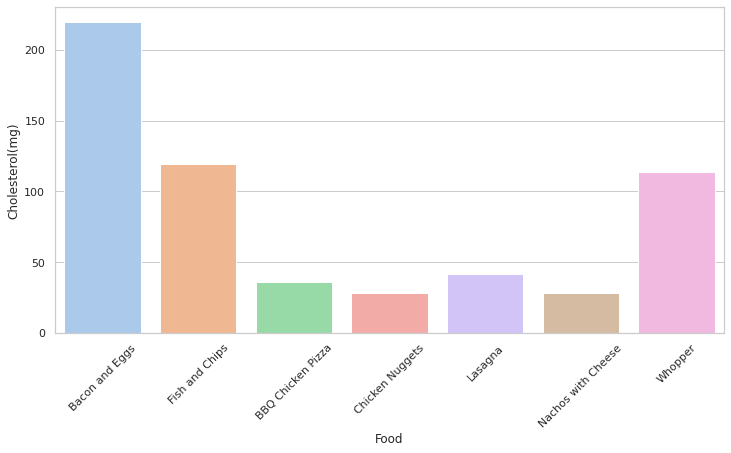

In [13]:
sns.barplot(y="Cholesterol(mg)", x = "Food", data = df_food_comparative3,  palette="pastel");
plt.xticks(rotation=45);

### Compruebo que el alimento que más colesterol tiene de los comparados es "Bacon and Eggs".

### 2. Para poder utilizar la columna health labels, la cual me da mucha información de cada alimento, hago un input a la columna, donde el usuario deberá introducir un alimento de los que están en la columna Food. La respuesta será una lista con toda la información almacenada de dicho alimento ingresado por el usuario.

In [14]:
lista_health = list(df["healthLabels"])

In [15]:
lista_health

["['SUGAR_CONSCIOUS', 'LOW_POTASSIUM', 'KIDNEY_FRIENDLY', 'KETO_FRIENDLY', 'VEGETARIAN', 'PESCATARIAN', 'GLUTEN_FREE', 'WHEAT_FREE', 'EGG_FREE', 'PEANUT_FREE', 'TREE_NUT_FREE', 'SOY_FREE', 'FISH_FREE', 'SHELLFISH_FREE', 'PORK_FREE', 'RED_MEAT_FREE', 'CRUSTACEAN_FREE', 'CELERY_FREE', 'MUSTARD_FREE', 'SESAME_FREE', 'LUPINE_FREE', 'MOLLUSK_FREE', 'ALCOHOL_FREE', 'NO_SUGAR_ADDED', 'KOSHER']",
 "['FAT_FREE', 'LOW_FAT_ABS', 'SUGAR_CONSCIOUS', 'KIDNEY_FRIENDLY', 'KETO_FRIENDLY', 'VEGAN', 'VEGETARIAN', 'PESCATARIAN', 'PALEO', 'SPECIFIC_CARBS', 'MEDITERRANEAN', 'DASH', 'DAIRY_FREE', 'GLUTEN_FREE', 'WHEAT_FREE', 'EGG_FREE', 'MILK_FREE', 'PEANUT_FREE', 'TREE_NUT_FREE', 'SOY_FREE', 'FISH_FREE', 'SHELLFISH_FREE', 'PORK_FREE', 'RED_MEAT_FREE', 'CRUSTACEAN_FREE', 'CELERY_FREE', 'MUSTARD_FREE', 'SESAME_FREE', 'LUPINE_FREE', 'MOLLUSK_FREE', 'ALCOHOL_FREE', 'NO_OIL_ADDED', 'NO_SUGAR_ADDED', 'SULPHITE_FREE', 'FODMAP_FREE', 'KOSHER']",
 "['SUGAR_CONSCIOUS', 'LOW_POTASSIUM', 'KIDNEY_FRIENDLY', 'KETO_FRIEND

In [16]:
len(lista_health)

549

In [18]:
def health():

    valor1=input("Ingrese un ingrediente:")

    res = df[df["Food"] == valor1]
    return list(res["healthLabels"])

health()

Ingrese un ingrediente:Lemon


["['FAT_FREE', 'LOW_FAT_ABS', 'SUGAR_CONSCIOUS', 'LOW_POTASSIUM', 'KIDNEY_FRIENDLY', 'KETO_FRIENDLY', 'VEGAN', 'VEGETARIAN', 'PESCATARIAN', 'PALEO', 'SPECIFIC_CARBS', 'MEDITERRANEAN', 'DASH', 'DAIRY_FREE', 'GLUTEN_FREE', 'WHEAT_FREE', 'EGG_FREE', 'MILK_FREE', 'PEANUT_FREE', 'TREE_NUT_FREE', 'SOY_FREE', 'FISH_FREE', 'SHELLFISH_FREE', 'PORK_FREE', 'RED_MEAT_FREE', 'CRUSTACEAN_FREE', 'CELERY_FREE', 'MUSTARD_FREE', 'SESAME_FREE', 'LUPINE_FREE', 'MOLLUSK_FREE', 'ALCOHOL_FREE', 'NO_OIL_ADDED', 'NO_SUGAR_ADDED', 'SULPHITE_FREE', 'FODMAP_FREE', 'KOSHER']"]

### 3. Para que el usuario pueda comparar valores de dos alimentos o ingredientes cualesquiera contenidos en la lista Food del dataframe, creo una función que pida al usuario ambos ingredientes y me dará como resultado una gráfica, en este caso comparando los valores de Calcio y Vitamina C de cada uno.

In [22]:
def comparative(df):

    valor_1=input("Ingrese un ingrediente:")
    valor_2=input("Ingrese un ingrediente:")

    res1 = df[(df["Food"] == valor_1 )| (df["Food"] == valor_2)]
 
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10),sharey = True) 
    sns.barplot(y="Calcium(mg)", x = "Food", data = res1,  palette="mako", ax=ax[0])
    sns.barplot(y="VIT C(mg)", x = "Food", data = res1,  palette="mako", ax=ax[1]);

Ingrese un ingrediente:Broccoli
Ingrese un ingrediente:Lemon


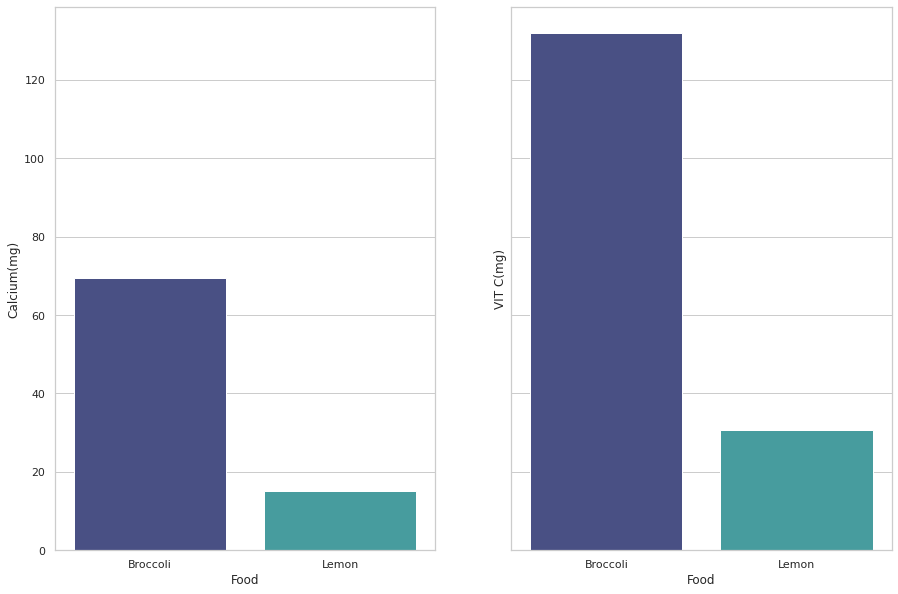

In [23]:
comparative(df)